In [19]:
import xarray as xr 
import matplotlib.pyplot as plt 
from thermal.plotting import enthalpy_pcolormesh

plt.rcParams['text.usetex'] = True

In [8]:
extrn = '/Volumes/thermal/Thesis/thermal-structure/expr/BB_TemperateControl'
isotherm = xr.open_dataset(extrn + '/result/crmpt12/gridded/crmpt12_dx_50_NT_3000_dt_1.0_MB_-0.444_OFF_ISOTHERM_prog.nc')
isotherm = isotherm.squeeze()

In [14]:
ssd = '/Volumes/thermal_ssd/crmpt12/thinned/'
polytherm = xr.open_zarr(ssd + 'crmpt12_dx_50_NT_30000_dt_0.1_MB_-0.37_OFF_Tma_-8.5_prog.zarr')
polytherm = polytherm.squeeze()

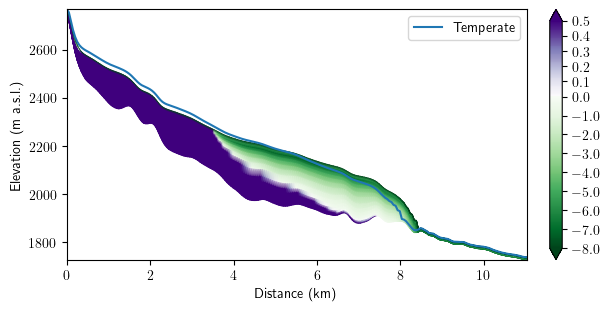

In [23]:
fig, ax, cbar = enthalpy_pcolormesh(polytherm, -1)

ax.plot(isotherm.X[0,::-1]/1e3, 
        isotherm.Z.isel(t=-1, coord_2=-1), 
        label = 'Temperate')

ax.set_ylabel('Elevation (m a.s.l.)')
ax.set_xlabel('Distance (km)')

ax.legend()

fig.savefig('../figs/crmpt12/SS_profile_compare.png', dpi=400)

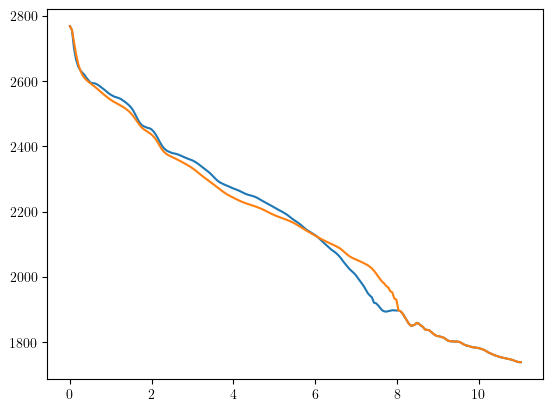

In [24]:
fig, ax = plt.subplots()

ax.plot(isotherm.X[0,::-1]/1e3, 
        isotherm.Z.isel(t=0, coord_2=-1), 
        label = 'Temperate')
ax.plot(isotherm.X[0,::-1]/1e3, 
        isotherm.Z.isel(t=-1, coord_2=-1), 
        label = 'Temperate')
